<a href="https://colab.research.google.com/github/torresmateo/covid19/blob/master/Estimators.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# COVID-19 simple estimators

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from countryinfo import CountryInfo
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.rcParams['figure.figsize'] = [12, 8]
sns.set()

In [2]:
# get the dataset from https://www.kaggle.com/imdevskp/corona-virus-report and paste it on ../data
df = pd.read_csv('../data/covid_19_clean_complete.csv')
df['Date'] = df['Date'].astype('datetime64[ns]')

In [3]:
south_america = ['Argentina', 'Uruguay', 'Chile', 'Bolivia', 'Paraguay', 'Brazil', 'Ecuador', 'Colombia', 'Venezuela', 'Peru', 'Guyana', 'Suriname', 'French Guiana']
all_countries = df['Country/Region'].unique()

# Simple Linear Regression

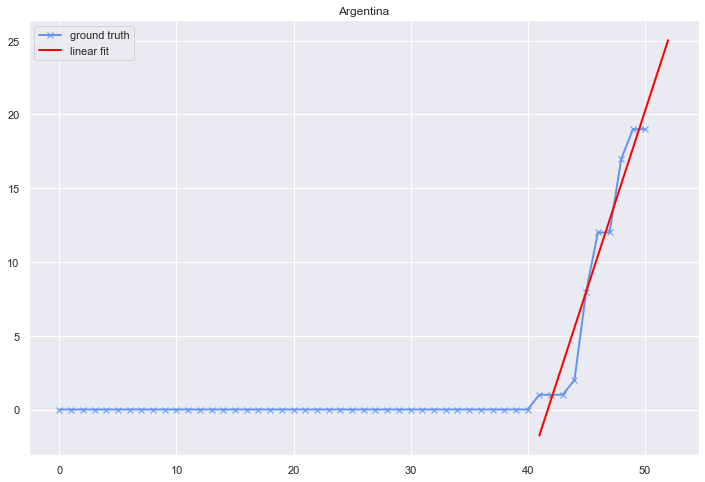

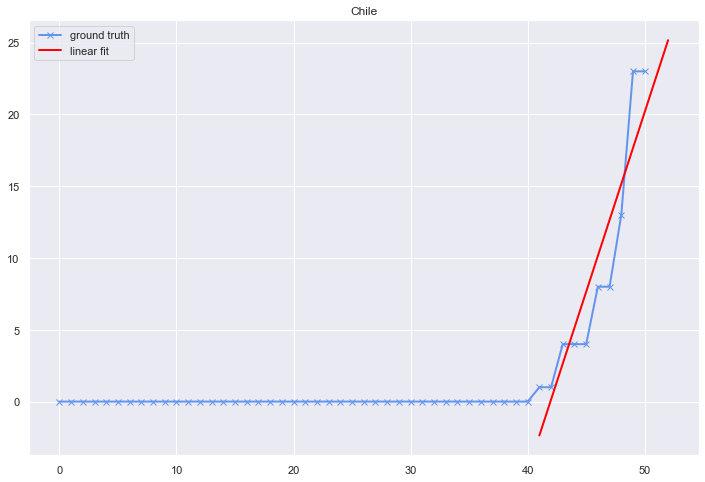

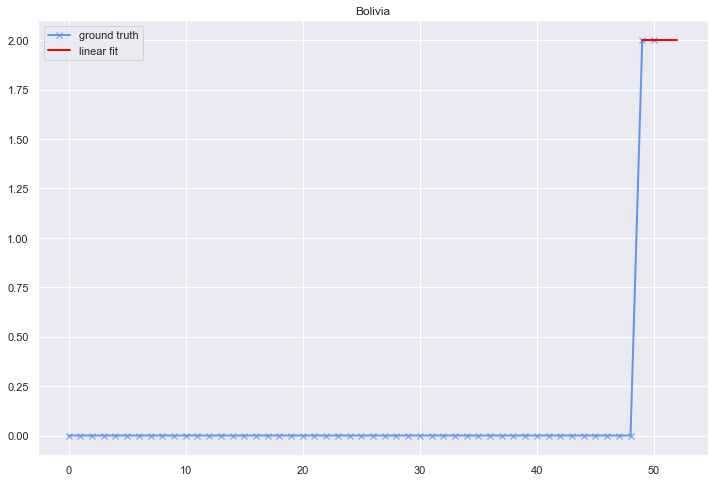

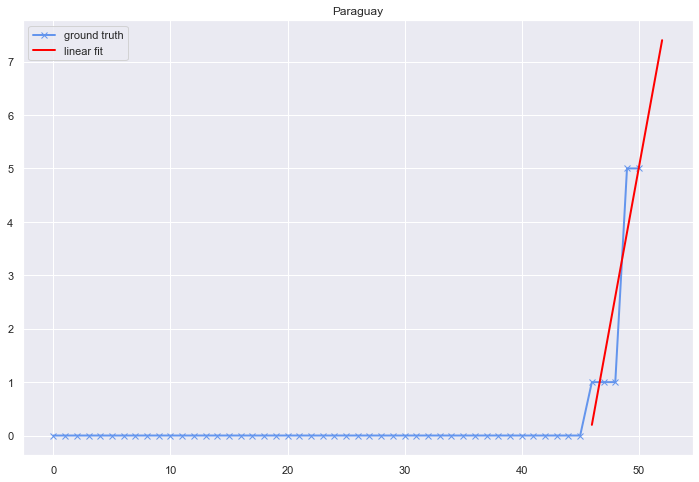

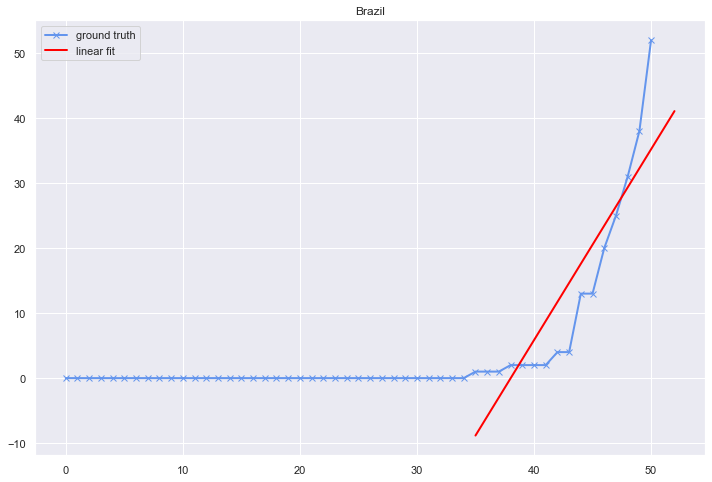

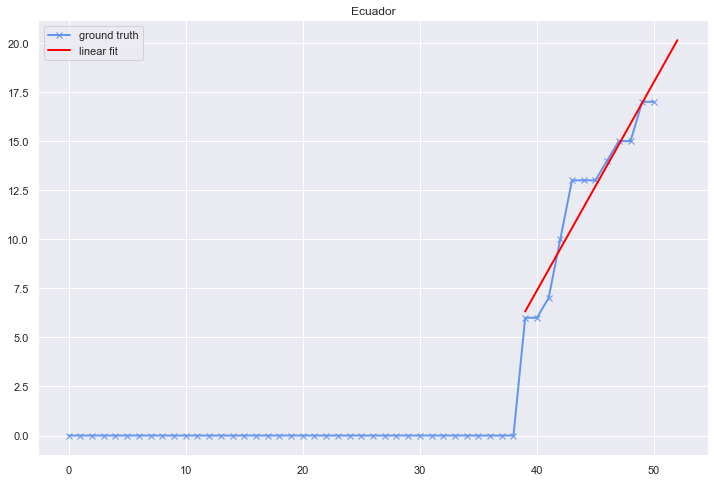

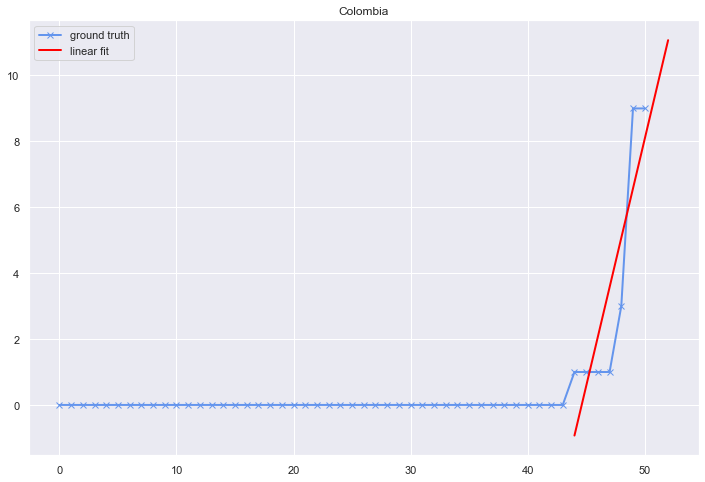

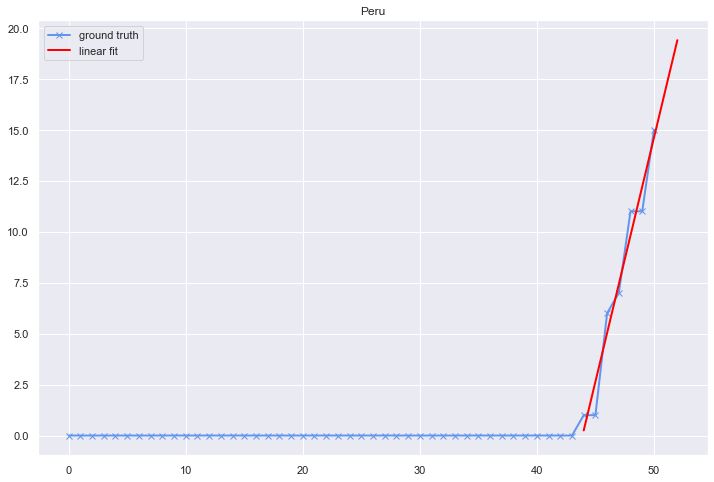

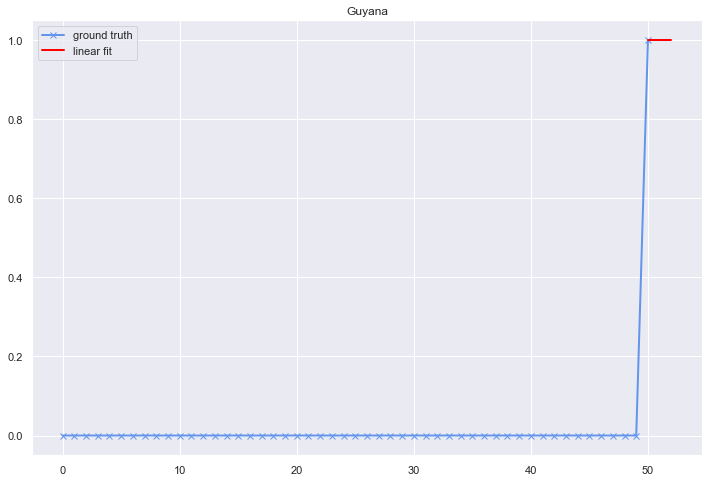

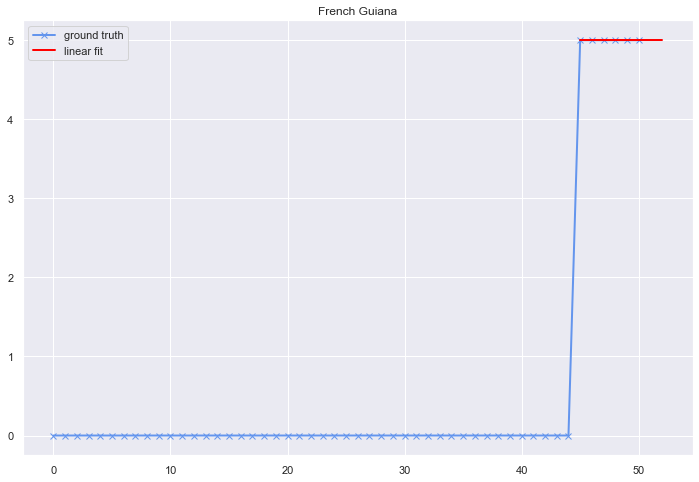

In [4]:
regressions = {}
for c in south_america:
    df_c = df[df['Country/Region'] == c].sort_values('Date')
    X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
    y = df_c.Confirmed.to_numpy()
    if y.shape[0] > 0:
        # don't model zeroes
        y_fit = y[y>0]
        X_fit = X[-y_fit.shape[0]:]
        X_pred = np.append(X_fit, [X_fit.max()+1, X_fit.max()+2]).reshape(-1,1)
        plt.title(c)
        regressions[c] = LinearRegression().fit(X_fit, y_fit)
        plt.plot(X, y, marker='x', color='cornflowerblue', linewidth=2,
             label="ground truth")
        Y_pred = regressions[c].predict(X_pred)
        plt.plot(X_pred, Y_pred, color='red',linewidth=2,
             label="linear fit")
        plt.legend()
        plt.show()


# Polynomial Regression

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


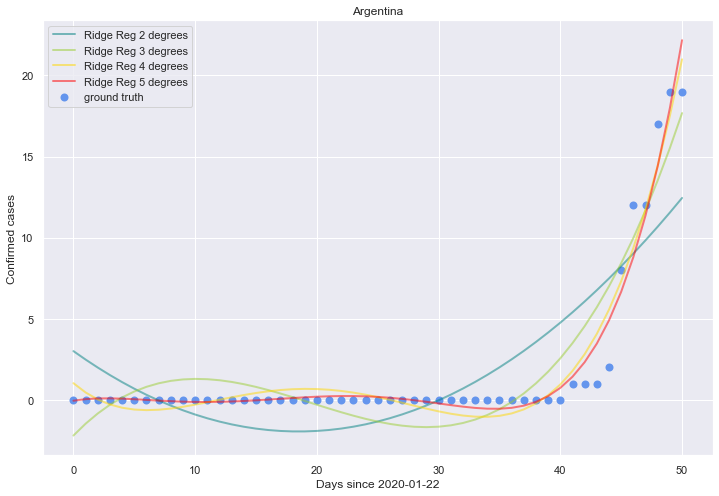

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


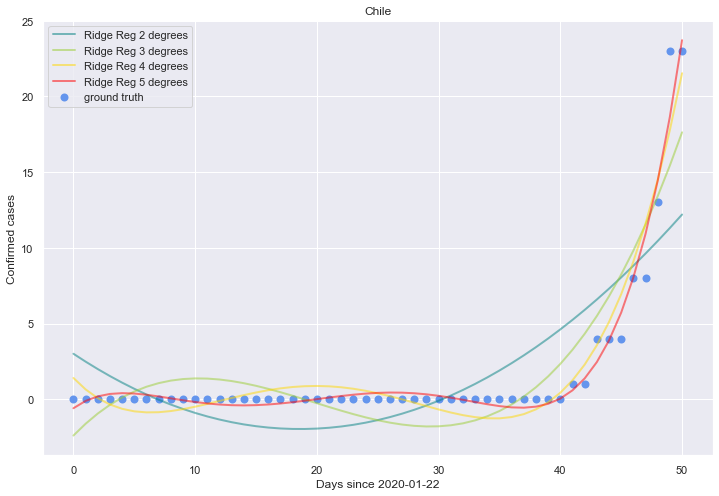

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


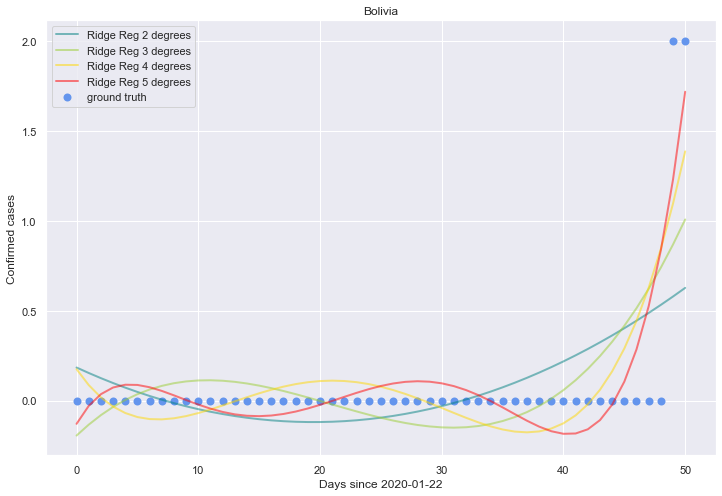

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


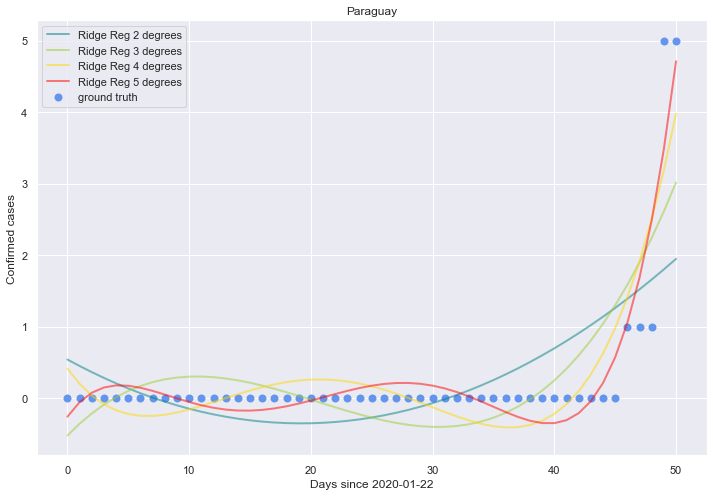

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


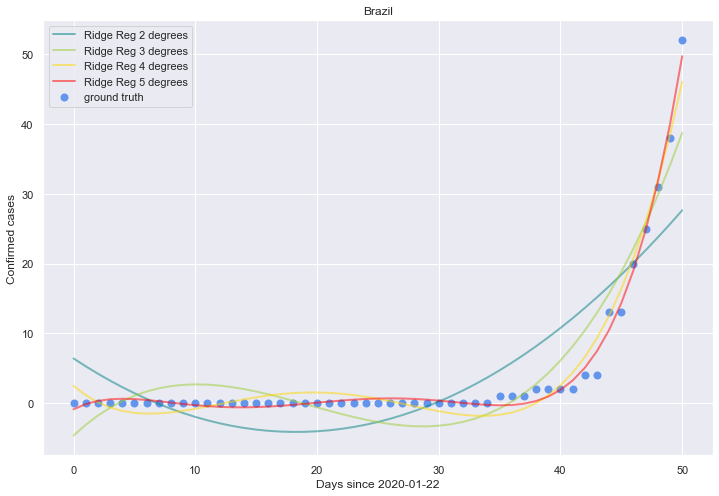

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


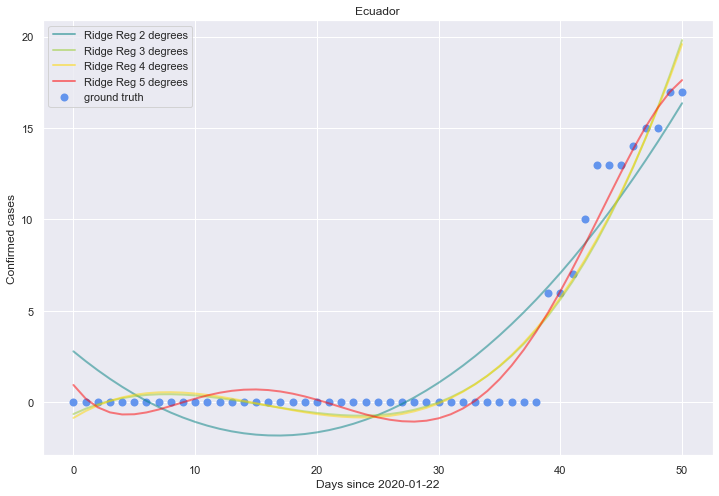

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


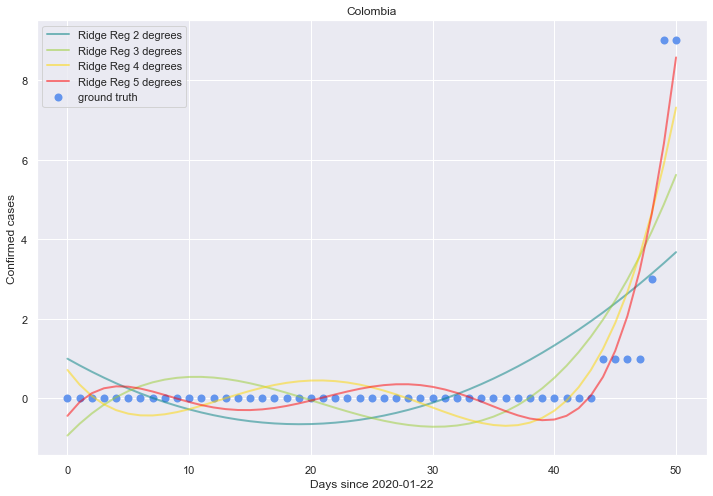

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


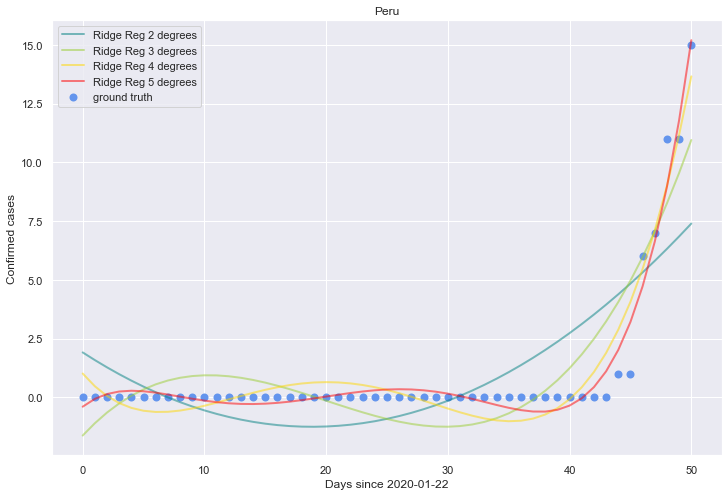

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


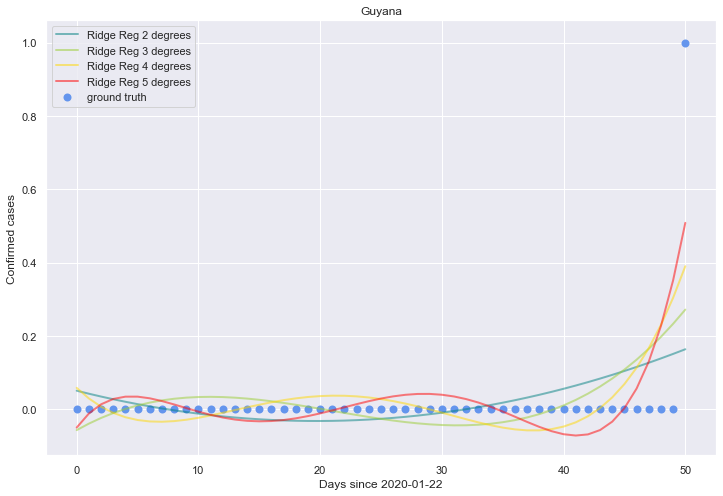

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84074e-18): result may not be accurate.
  overwrite_a=True).T


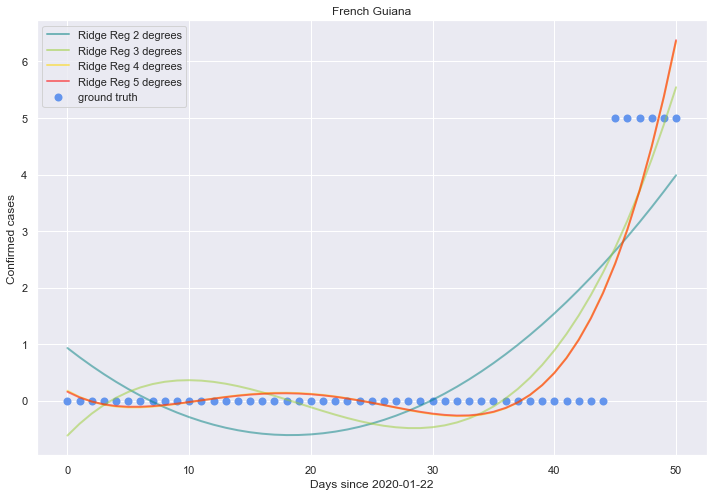

In [5]:
colors = ['teal', 'yellowgreen', 'gold', 'red']
for c in south_america:
    df_c = df[df['Country/Region'] == c].sort_values('Date')
    X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
    y = df_c.Confirmed.to_numpy()
    if y.shape[0] > 0:
        plt.title(c)
        plt.scatter(X, y, color='cornflowerblue', linewidth=2,
             label="ground truth")
        for count, degree in enumerate([2, 3, 4, 5]):
            model = make_pipeline(PolynomialFeatures(degree), Ridge())
            model.fit(X, y)
            y_plot = model.predict(X)
            plt.plot(X, y_plot, color=colors[count], linewidth=2,
                     label=f'Ridge Reg {degree} degrees', alpha=0.5)
        plt.legend(loc='upper left')
        plt.ylabel('Confirmed cases')
        plt.xlabel('Days since 2020-01-22')
        plt.savefig(f'{c}-RidgeModels.png')
        plt.show()

# Average growth rate

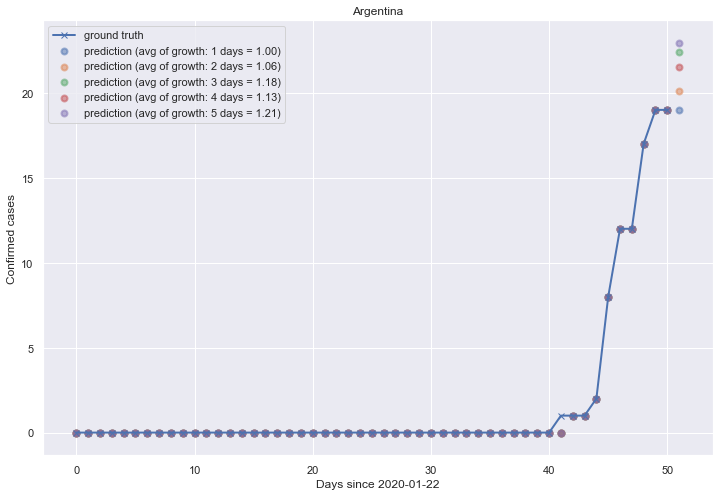

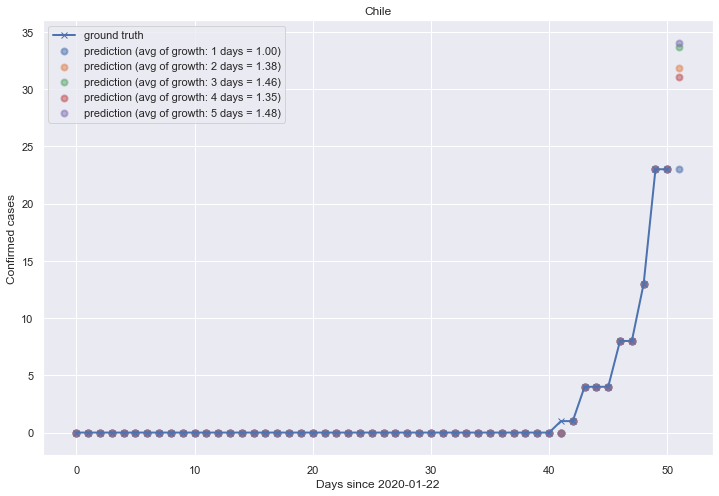

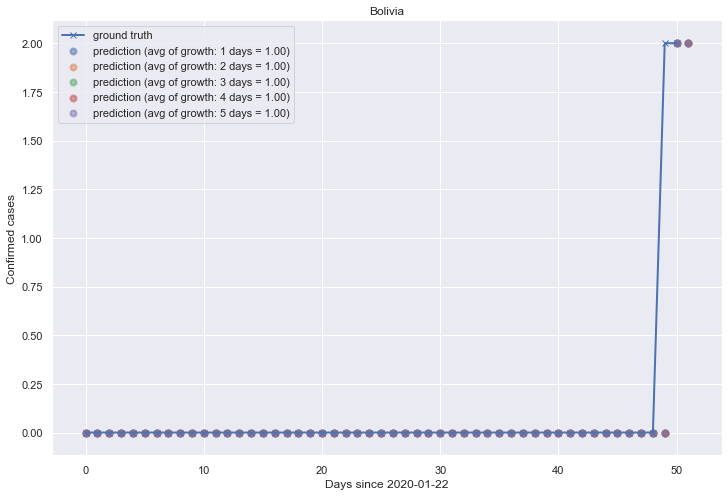

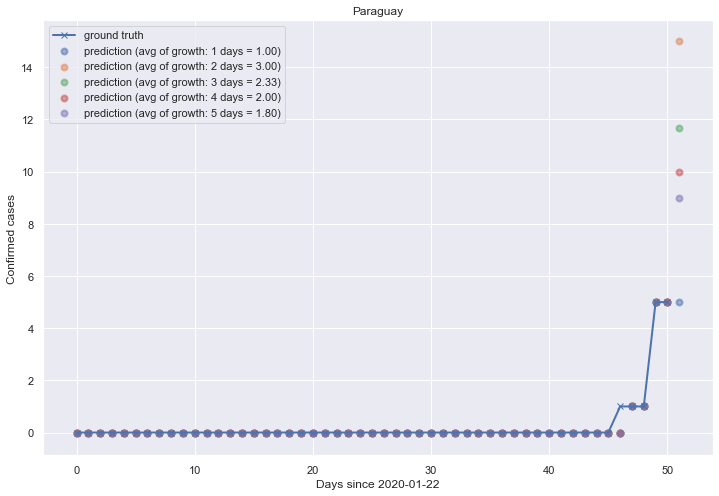

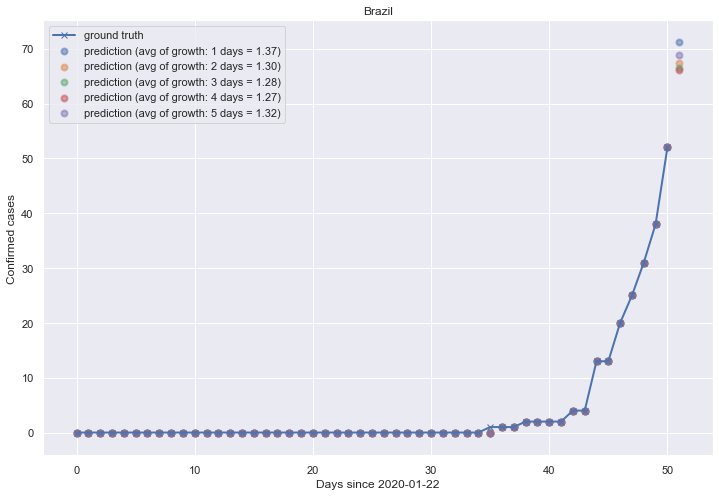

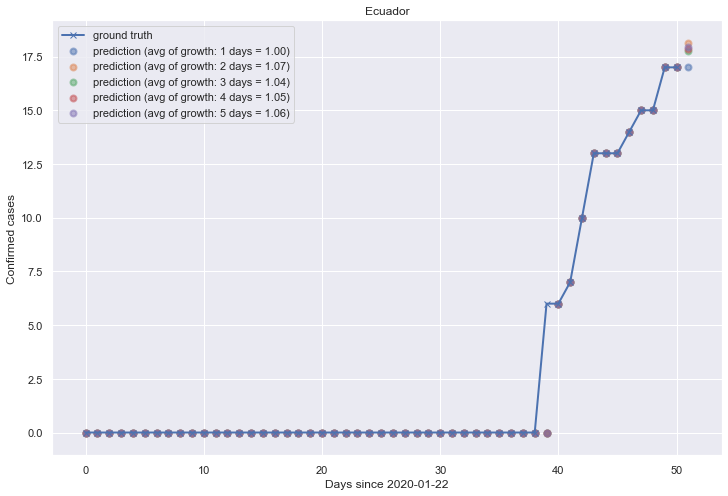

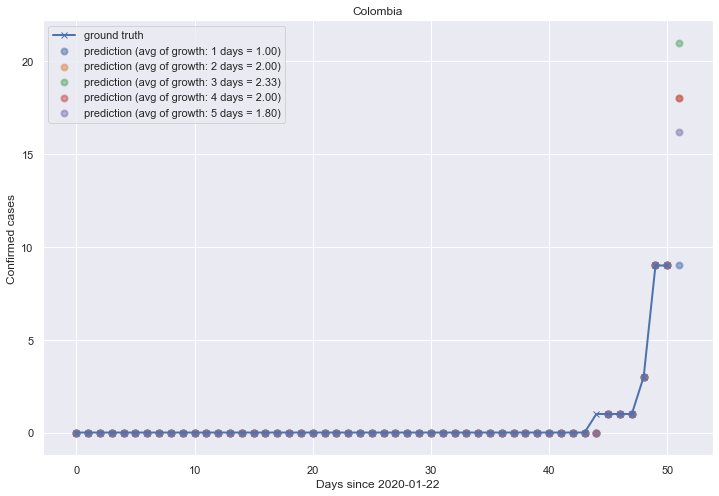

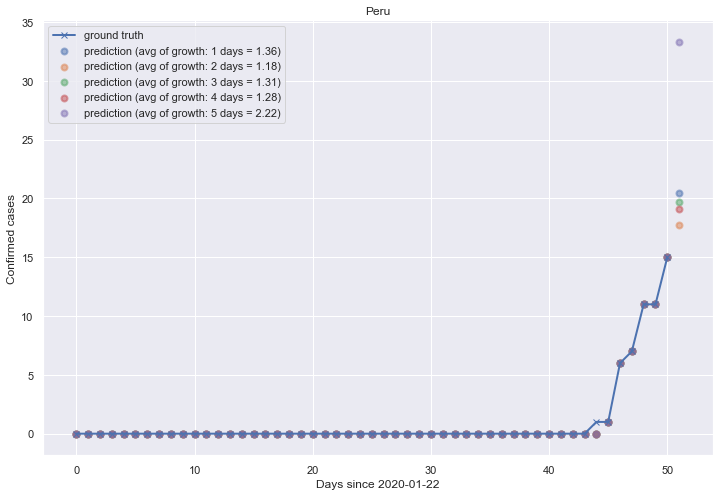

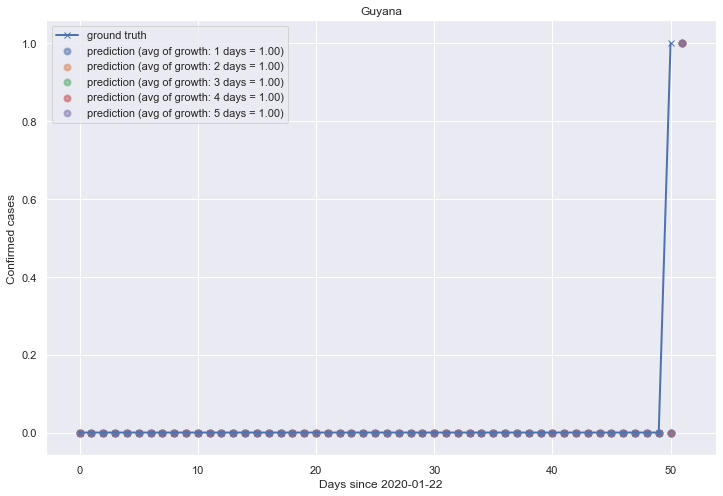

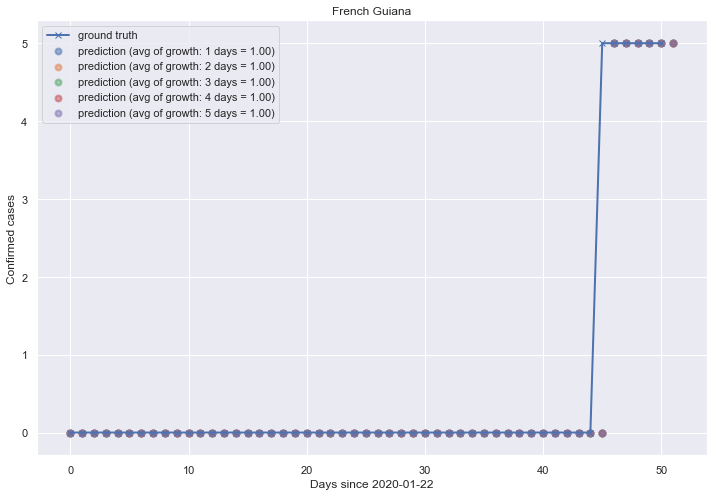

In [6]:
colors = ['teal', 'yellowgreen', 'gold', 'red']
growths = {'country':[], 'avg_1':[], 'avg_2':[], 'avg_3':[], 'avg_4':[], 'avg_5':[]}
for c in south_america:
    df_c = df[df['Country/Region'] == c].sort_values('Date')
    X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
    X_predict = (np.array(list(range(df_c.shape[0] + 1))).reshape(-1,1))
    y = df_c.Confirmed.to_numpy()
    if y.shape[0] > 0:
        growth_rate = np.ones(y.shape[0])
        # learn
        for i in range(y.shape[0]-1):
            if y[i] != 0 and y[i+1] != 0:
                growth_rate[i] = y[i+1]/y[i]
        
        plt.title(c)
        plt.plot(X, y, marker='x', linewidth=2,
             label="ground truth")
        # predict 
        growths[c] = {}
        for avg_days in [1,2,3,4,5]:
            growth_rate[-1] = growth_rate[-(avg_days+1):-1].mean()
            y_pred = np.multiply(y, growth_rate)
            y_pred = np.insert(y_pred,0,y_pred[0])
            plt.scatter(X_predict, y_pred, linewidth=2,
                     label=f'prediction (avg of growth: {avg_days} days = {growth_rate[-1]:.2f})', alpha=0.5)
        plt.legend(loc='upper left')
        plt.ylabel('Confirmed cases')
        plt.xlabel('Days since 2020-01-22')
        plt.show()